# Machine Learning Project-Mouse with Down Syndrome 

## Dhachainee Murugayah (S3794334) 
***

## Table of the content 
- [Goal and Objectives](#aa)
- [Task 1: Retrieving and Preparing the Data](#a)
 - [Missing Values](#a1)
 - [Redundant Features](#a2)
- [Task 2.1: Explore each column](#b)
- [Task 2.2: Explore the relationship between pairs of attributes](#c)
- [Task 3: Data Modelling](#d)
 - [Methodologys](#d1)
 - [Feature selection](#d2)
 - [Feature scaling](#d3)
  - [Target encoding](#d33)
 - [Classification Algorithm ](#d4)
  - [KNN](#d41)
   - [KNN  tuning ](#d411)
  - [Decision Tree](#d42)
   - [Decision Tree tuning](#d422)
 - [Performance comparison](#d5)
- [Limitations and Solutions](#e)
- [Summary and Conclusion](#f)

# Goal and Objectives <a name="aa"></a>
## Goal
The goal is to analyze the influence of proteins that impact the recuperating ability of the Down Syndrome mice to learn by conducting a comparative exploration on two different classification models. 

## Objectives
- To perform data analysis to acquire fascinating insights from the dataset
- To build a classification model which will be able to determine protein in the mouse of Down Syndrome effectively with high accuracy. 
- To identify relevant features with the help of feature selection techniques in order to minimize dimensionality 

# Task 1: Retrieving and Preparing the Data <a name="a"></a>


The dataset is obtained from <a href="https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression">UCI Machine Learning Repository</a>. It has 77 expression levels of protein or modified proteins that acquired through the signals that detected in the nuclear fraction of cortex. There are 72 mice where 38 of the mice are control mice and the rest 34 are trisomic (Down syndrome) mice. 15 measurements have taken for each protein and the mouse resulting 1080 measurements in total per protein.Hence this dataset has 1080 rows and 82 columns. A few mice have been infused with drug and other have not to evaluate the impact of the memantine drug in recuperating the ability to learning in mice with Down syndrome. 

The dataset is directly read and imported from the file stored in jupyter.

In [1]:
# Set a seed value
seed_value = 999 
# 1. Initialise `PYTHONHASHSEED` environment variable
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Initialise Python's own pseudo-random generator
import random
random.seed(seed_value)
# 3. Initialise Numpy's pseudo-random generator
import numpy as np
np.random.seed(seed_value)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

#importing/reading the data 
df = pd.read_csv('Data_Cortex_Nuclear.csv', sep = ',')

# View the dataset
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


The shape of the dataset is checked to make sure the data has been downloaded properly. Also, the features type is checked to have a better understanding about the structure and format about the dataset. 

In [3]:
#checking the shape of the dataset
df.shape

(1080, 82)

In [4]:
#checking the type of the attributes
df.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [5]:
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


*MouseID* column will be dropped from the table as it is generated only for unique identification purposes.

In [6]:
# drop MouseID
df=df.drop(['MouseID'], axis=1)

## Missing Values <a name="a1"></a>

Calculating number of the missing values in each columns

In [7]:
df.isnull().sum()

DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

There are 82 columns in this dataset. Rows with more or equal to 75 null values will be dropped as dataset with few columns won't be sufficient to perform the analysis.The rest of the null values will be replaced with mean. 

In [8]:
#Dropping the null values
df = df.dropna(how='any', thresh=75)

#Replacing the null values with mean
df = df.fillna(df.mean())

In [9]:
#checking the null values after filling and dropping
df.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

## Redundant Features <a name="a2"></a>

Duplicates columns in the dataset will be checked and removed. 

In [10]:
def getDuplicateColumns(df):
    
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [11]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  pS6_N


In [12]:
# drop the duplicate column
df=df.drop(['pS6_N'], axis=1)

# Task 2.1: Explore each column <a name="b"></a>

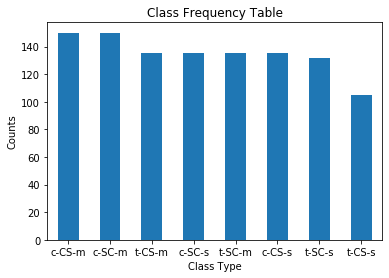

In [13]:
# Plot frequency of unique values for 'class'
df['class'].value_counts().plot(kind='bar')
plt.title('Class Frequency Table')
plt.xlabel('Class Type')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()

Class of Shock Context(SC) and Context Shock(CS) of the control mice with the Memantine treatment are the highest with equal counts whereas the class of Context Shock(CS) of the trisomic mice  with the Saline treatment is the lowest. 

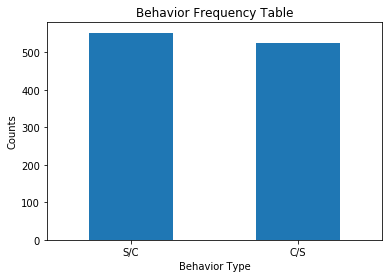

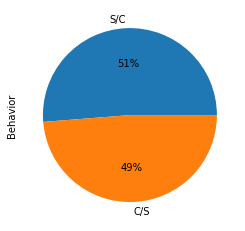

In [14]:
# Plot frequency of unique values for 'class'
df['Behavior'].value_counts().plot(kind='bar')
plt.title('Behavior Frequency Table')
plt.xlabel('Behavior Type')
plt.xticks(rotation='horizontal')
plt.ylabel('Counts')
plt.show()

df['Behavior'].value_counts().plot.pie(autopct='%1.0f%%')

In the behaviour of the mice, it is clearly shows that majority of the mice are Shock Context(SC) which means not stimulated to learn and only 49% of the mice are Context Shock(CS) which means stimulated to learn. 

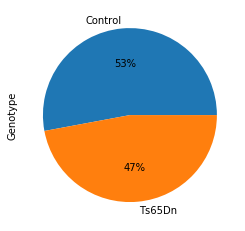

In [15]:
df['Genotype'].value_counts().plot.pie(autopct='%1.0f%%')

Less number of trisomic mice(Down Syndrome) is used in this experiment compare to the control mice. 

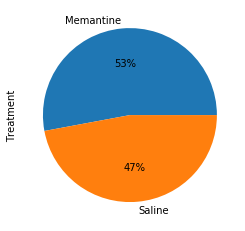

In [16]:
df['Treatment'].value_counts().plot.pie(autopct='%1.0f%%')

More than half of the treatment used Memantine drug in this experiment and Saline is used for the rest of the treatment. 

Text(0, 0.5, 'Counts')

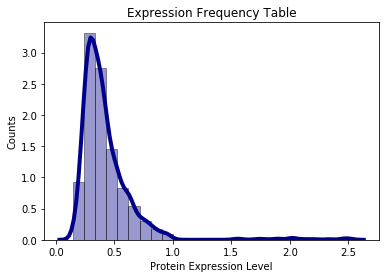

In [17]:
# Histogram of protein expression level - DYRK1A
sns.distplot(df['DYRK1A_N'], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

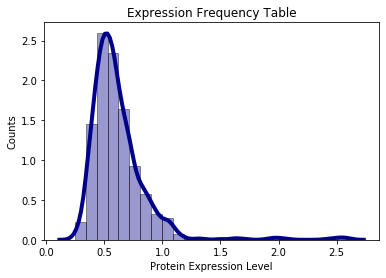

In [18]:
# Histogram of protein expression level - ITSN1_N
sns.distplot(df['ITSN1_N'], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

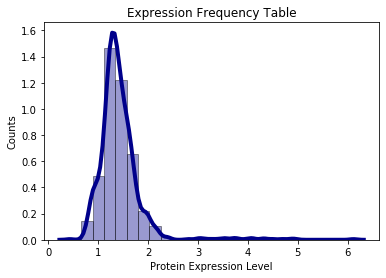

In [19]:
# Histogram of protein expression level - pELK_N
sns.distplot(df['pELK_N'], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')

The histogram of DYRK1A, ITSN1_N and pELK_N are skewed to the right as they have very less larger values on the right side. The few large values brought the mean upwards without affecting the median. Hence, the mean value is higher than the median in these graphs. 

Text(0, 0.5, 'Counts')

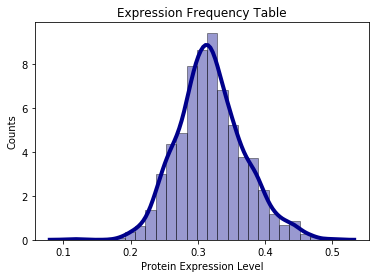

In [20]:
# Histogram of protein expression level - BDNF_N
sns.distplot(df['BDNF_N'], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

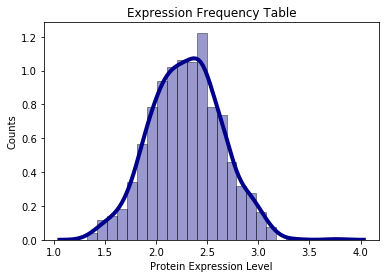

In [21]:
# Histogram of protein expression level - NR1_N
sns.distplot(df['NR1_N'], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

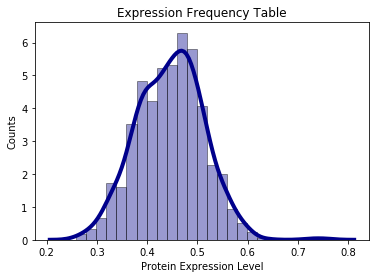

In [22]:
# Histogram of protein expression level - SYP_N
sns.distplot(df['SYP_N'], hist=True, kde=True, 
             bins=25, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Expression Frequency Table')
plt.xlabel('Protein Expression Level')
plt.ylabel('Counts')

The histogram of BDNF_N, NR1_N and SYP_N are in the same shape at both side from the middle denote the data are symmetric. In the symmetric data, both the mean value are median are almost same. 

# Task 2.2: Explore the relationship between pairs of attributes <a name="c"></a>

Ten pairs of columns are chosen to explore the relationship between the columns. The first  pair is 'Genotype' and 'Treatment'. These two columns are explored to address whether not all the Control mice received Memantine treatment. 

plausible hypothesis: Not all the Control mice received Memantine treatment. 

In [23]:
Control=df['Genotype']=='Control'
Control.value_counts()

True     570
False    507
Name: Genotype, dtype: int64

In [24]:
Treatment=df.loc[Control,'Treatment'].value_counts()
Treatment

Memantine    300
Saline       270
Name: Treatment, dtype: int64

Text(0, 0.5, 'Counts')

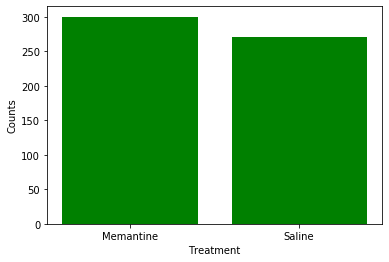

In [25]:
plt.bar(list(range(2)), Treatment,color='green', align='center')
plt.xticks(list(range(2)),['Memantine','Saline'])
plt.xlabel('Treatment')
plt.ylabel('Counts')

The graph above shows that, majority of the Control mice received Memantine drug in the treatment. From 570 Control mice, 300 of the mice are treated using Memantine and the rest 270 mice treated with Saline. It clearly shows that, Control mice are treated with both Memantine and Saline. <br>
*The plausible hypothesis is proved.*

The second  pair is 'Genotype' and 'Treatment'. These two columns are explored to address whether the most of the Down Syndrome mice received Memantine treatment. 

plausible hypothesis: Most of the Down Syndrome mice received Memantine treatment. 

In [26]:
Control=df['Genotype']=='Ts65Dn'
Control.value_counts()

False    570
True     507
Name: Genotype, dtype: int64

In [27]:
Treatment=df.loc[Control,'Treatment'].value_counts()
Treatment

Memantine    270
Saline       237
Name: Treatment, dtype: int64

Text(0, 0.5, 'Counts')

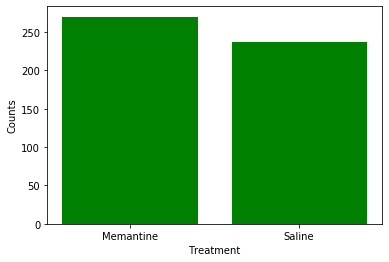

In [28]:
plt.bar(list(range(2)), Treatment,color='green', align='center')
plt.xticks(list(range(2)),['Memantine','Saline'])
plt.xlabel('Treatment')
plt.ylabel('Counts')

The graph above shows that,majority of the trisomic mice received Memantine drug in the treatment. From 507 trisomic mice, 270 of the mice are treated using Memantine and the rest 237 mice are treated with Saline. It clearly shows that, trisomic mice are mostly treated using Memantine. <br>
*The plausible hypothesis is proved.*

The third  pair is 'Treatment' and 'Genotype'. These two columns are explored to address whether Memantine treatment is mostly given to Down Syndrome (Ts65Dn) mice. 

plausible hypothesis: Memantine treatment is mostly given to Down Syndrome (Ts65Dn) mice. 

In [29]:
Treatment=df['Treatment']=='Memantine'
Treatment.value_counts()

True     570
False    507
Name: Treatment, dtype: int64

In [30]:
Control=df.loc[Treatment,'Genotype'].value_counts()
Control

Control    300
Ts65Dn     270
Name: Genotype, dtype: int64

Text(0, 0.5, 'Counts')

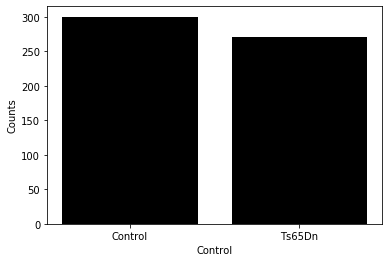

In [31]:
plt.bar(list(range(2)), Control,color='black', align='center')
plt.xticks(list(range(2)),['Control','Ts65Dn'])
plt.xlabel('Control')
plt.ylabel('Counts')

The graph above shows that,most of the Memantine treatment is given to Control mice compare to the trisomic mice. From 570 Memantine treatments given, 300 treatments are given to Control mice and the rest 270 Memantine treatments are given to trisomic mice (Down Syndrome). <br>
*The plausible hypothesis is not proved.*

The fourth  pair is 'Treatment' and 'Genotype'. These two columns are explored to address whether Saline treatment is mostly given to Control mice.

plausible hypothesis: Saline treatment is mostly given to Control mice . 

In [32]:
Treatment=df['Treatment']=='Saline'
Treatment.value_counts()

False    570
True     507
Name: Treatment, dtype: int64

In [33]:
Control=df.loc[Treatment,'Genotype'].value_counts()
Control

Control    270
Ts65Dn     237
Name: Genotype, dtype: int64

Text(0, 0.5, 'Counts')

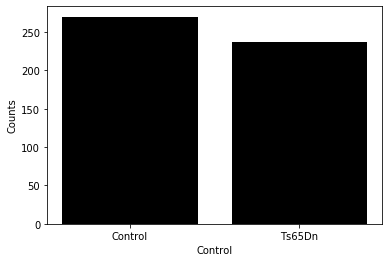

In [34]:
plt.bar(list(range(2)), Control,color='black', align='center')
plt.xticks(list(range(2)),['Control','Ts65Dn'])
plt.xlabel('Control')
plt.ylabel('Counts')

The graph above shows that,most of the Saline treatment is given to Control mice compare to the trisomic mice. From 507 Saline treatments given, 270 treatments are given to Control mice and the rest 237 Saline treatments are given to trisomic mice (Down Syndrome). <br>
*The plausible hypothesis is proved.*

The fifth  pair is 'Genotype' and 'Behavior'. These two columns are explored to address if all the control mice are belongs to Context Shock(C/S) behavior.

plausible hypothesis: all the control mice are belongs to Context Shock(C/S) behavior

In [35]:
Genotype=df['Genotype']=='Control'
Genotype.value_counts()

True     570
False    507
Name: Genotype, dtype: int64

In [36]:
Behavior=df.loc[Genotype,'Behavior'].value_counts()
Behavior

S/C    285
C/S    285
Name: Behavior, dtype: int64

Text(0, 0.5, 'Counts')

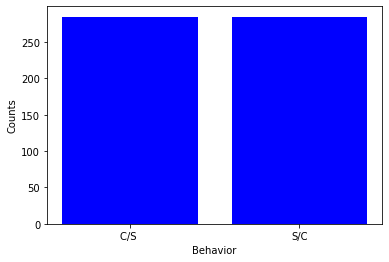

In [37]:
plt.bar(list(range(2)), Behavior,color='blue', align='center')
plt.xticks(list(range(2)),['C/S ','S/C'])
plt.xlabel('Behavior')
plt.ylabel('Counts')

The graph above shows that, Control mice have both Context Shock(C/S) behavior and Shock Context (S/C) behavior equally with the total counts of 285 each. <br>
*The plausible hypothesis is not proved.*

The sixth  pair is 'Genotype' and 'Behavior'. These two columns are explored to address if most the trisomic mice are belongs to  Shock Context(S/C) behavior.

plausible hypothesis: Most the trisomic mice have Shock Context(S/C) behavior.

In [38]:
Genotype=df['Genotype']=='Ts65Dn'
Genotype.value_counts()

False    570
True     507
Name: Genotype, dtype: int64

In [39]:
Behavior=df.loc[Genotype,'Behavior'].value_counts()
Behavior

S/C    267
C/S    240
Name: Behavior, dtype: int64

Text(0, 0.5, 'Counts')

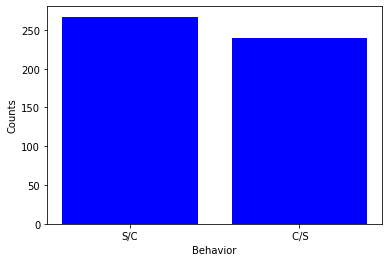

In [40]:
plt.bar(list(range(2)), Behavior,color='blue', align='center')
plt.xticks(list(range(2)),['S/C',' C/S'])
plt.xlabel('Behavior')
plt.ylabel('Counts')

The graph above shows that, trisomic mice are mostly have Shock Context(S/C) behavior. From 507 trisomic mice, 267 mice have Shock Context(S/C) behavior and the rest 240 mice have Context Shock (C/S) behavior.  <br>
*The plausible hypothesis is proved.*

The sevent  pair is 'Behavior' and 'Genotype'. These two columns are explored to address if Shock Context(C/S) behavior is mostly from the Control mice .

plausible hypothesis: Shock Context(C/S) behavior is mostly from the Control mice .

In [41]:
Behavior=df['Behavior']=='S/C'
Behavior.value_counts()

True     552
False    525
Name: Behavior, dtype: int64

In [42]:
Genotype=df.loc[Behavior,'Genotype'].value_counts()
Genotype

Control    285
Ts65Dn     267
Name: Genotype, dtype: int64

Text(0, 0.5, 'Counts')

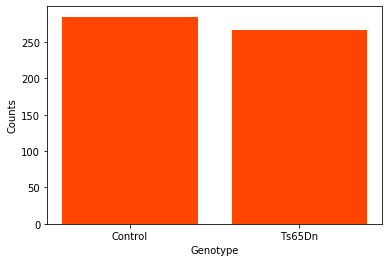

In [43]:
plt.bar(list(range(2)), Genotype,color='orangered', align='center')
plt.xticks(list(range(2)),['Control','Ts65Dn'])
plt.xlabel('Genotype')
plt.ylabel('Counts')

The graph above shows that, Control mice are mostly have Shock Context(S/C) behavior compare to trisomic mice. From 552 Shock Context(S/C) behavior, 285 Shock Context(S/C) behavior is from the Control mice and the rest 267 Shock Context(S/C) behavior is from the trisomic mice.  <br>
*The plausible hypothesis is proved.*

The eight  pair is 'Treatment' and 'Behavior'. These two columns are explored to address if most the mice that received Memantine treatment are belongs to Context Shock(C/S) behavior.

plausible hypothesis: Most of the Memantine treatment is given to the mice with Context Shock(C/S) behavior. 

In [44]:
Treatment=df['Treatment']=='Memantine'
Treatment.value_counts()

True     570
False    507
Name: Treatment, dtype: int64

In [45]:
Behavior=df.loc[Treatment,'Behavior'].value_counts()
Behavior

S/C    285
C/S    285
Name: Behavior, dtype: int64

Text(0, 0.5, 'Counts')

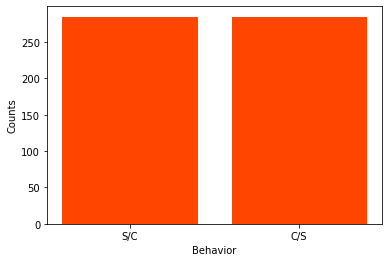

In [46]:
plt.bar(list(range(2)), Behavior,color='orangered', align='center')
plt.xticks(list(range(2)),['S/C','C/S'])
plt.xlabel('Behavior')
plt.ylabel('Counts')

The graph above shows that, Memantine treatment is equally given to mice which have Context Shock(C/S) behavior and Shock Context (S/C) behavior with the total counts of 285 each. <br>
*The plausible hypothesis is not proved.*

The nineth  pair is 'Treatment' and 'Behavior'. These two columns are explored to address if most the mice that received Saline treatment are belongs to Shock Context(C/S) behavior.

plausible hypothesis: Most of the Saline treatment is given to the mice with Shock Context(C/S) behavior. 

In [47]:
Treatment=df['Treatment']=='Saline'
Treatment.value_counts()

False    570
True     507
Name: Treatment, dtype: int64

In [48]:
Behavior=df.loc[Treatment,'Behavior'].value_counts()
Behavior

S/C    267
C/S    240
Name: Behavior, dtype: int64

Text(0, 0.5, 'Counts')

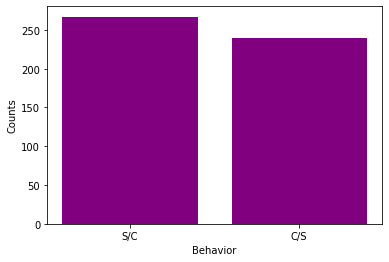

In [49]:
plt.bar(list(range(2)), Behavior,color='purple', align='center')
plt.xticks(list(range(2)),['S/C','C/S'])
plt.xlabel('Behavior')
plt.ylabel('Counts')

The graph above shows that, Saline treatment is mostly given to mice which have Shock Context (S/C) behavior. From 507 Saline treatments, 267 treatments are given to Shock Context (S/C) behavior mice and the rest 240 treatments are given to Context Shock (C/S) behavior mice. <br>
*The plausible hypothesis is proved.*

The last  pair is 'Behavior' and 'Treatment'. These two columns are explored to address if Shock Context(S/C) behavior mice are mostly received Memantine treatment.

plausible hypothesis: Mice with Shock Context(S/C) behavior are mostly received Memantine treatment.

In [50]:
Behavior=df['Behavior']=='S/C'
Behavior.value_counts()

True     552
False    525
Name: Behavior, dtype: int64

In [51]:
Treatment=df.loc[Behavior,'Treatment'].value_counts()
Treatment

Memantine    285
Saline       267
Name: Treatment, dtype: int64

Text(0, 0.5, 'Counts')

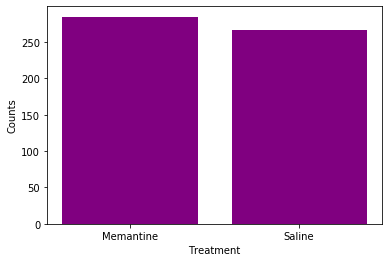

In [52]:
plt.bar(list(range(2)), Treatment,color='purple', align='center')
plt.xticks(list(range(2)),['Memantine','Saline'])
plt.xlabel('Treatment')
plt.ylabel('Counts')

The graph above shows that, the mice which have Shock Context (S/C) behavior mostly received Memantine treatment. From 552 Shock Context (S/C) behavior mice, 285 of them received Memantine treatment and the rest 267 Shock Context (S/C) behavior mice received Saline treatment. <br>
*The plausible hypothesis is proved.*

# Task 3: Data Modelling <a name="d"></a>

## Methodology <a name="d1"></a>

This project presents a comparative analysis of Mice Protein Expression using two different machine learning algorithms. 
The comparative analysis will be performed to study the influences of protein which could have impacted the recuperating ability of the Down Syndrome mice to learn.
In this project, 2 different machine learning algorithms will be used to build the models. Performance and the accuracy level of the models will be evaluated using hyperparameters tuning and cross-validation method.
The best model with high accuracy will be selected as the proposed model for this project. KNN and Decision tree are the algorithms that will be used in building the models.<br>
The proposed models will be involved five main stages of scrutiny:
 - First stage: Feature selection, where the important features will be selected to build the models
 - Second stage: Pre-processing stage where the selected features will go through scaling. Also the target feature is encoded to numeric. 
 - Third stage:Classification, where the 2 different algorithms used to build the models separately
 - Fourth stage:Model selection, where a grid search or hyperparameters tuning is used for the models to find the optimal parameters  
 - Fifth stage:  Performance comparison, where each model will be compared to the other models using paired t-tests

## Feature selection <a name="d2"></a>
Since this study is about analyzing the protein influence in the recovering learning ability among the trisomic mice, all the 76 expression levels of protein are used in the feature selection to find out 15 most important features. The feature selection is performed using Random Forest Importance(RFI). The'class' column that shows that result of the experiment is selected as the target variable.   

In [53]:
# Assigning the data and target
x = df.loc[:, 'DYRK1A_N':'CaNA_N']
y = df['class']


In [54]:
#performing feature selection
from sklearn.ensemble import RandomForestClassifier

num_features = 15
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(x, df['class'])
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = x.columns[fs_indices_rfi].values
best_features_rfi

array(['SOD1_N', 'pERK_N', 'pPKCG_N', 'APP_N', 'Ubiquitin_N', 'CaNA_N',
       'pPKCAB_N', 'DYRK1A_N', 'pCAMKII_N', 'ARC_N', 'BRAF_N', 'pP70S6_N',
       'ITSN1_N', 'Tau_N', 'S6_N'], dtype=object)

In [55]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.06447463, 0.03910714, 0.03905384, 0.03484362, 0.03295739,
       0.03106709, 0.02594929, 0.0257327 , 0.02543356, 0.02510229,
       0.0234713 , 0.0230527 , 0.02227448, 0.02204443, 0.02103054])

In [56]:
df_imp = pd.DataFrame({'features': best_features_rfi, 
                       'importances': feature_importances_rfi})
#list of 15 important features
df_imp

,features,importances
0,SOD1_N,0.064475
1,pERK_N,0.039107
2,pPKCG_N,0.039054
3,APP_N,0.034844
4,Ubiquitin_N,0.032957
5,CaNA_N,0.031067
6,pPKCAB_N,0.025949
7,DYRK1A_N,0.025733
8,pCAMKII_N,0.025434
9,ARC_N,0.025102


In [57]:
x = df[['SOD1_N', 'pPKCG_N', 'pERK_N', 'APP_N',
       'CaNA_N', 'BRAF_N', 'Ubiquitin_N', 'DYRK1A_N',
       'pPKCAB_N', 'pCAMKII_N', 'Tau_N',
       'ITSN1_N', 'pP70S6_N', 'ARC_N',
       'S6_N']].copy()

x.head(5)

,SOD1_N,pPKCG_N,pERK_N,APP_N,CaNA_N,BRAF_N,Ubiquitin_N,DYRK1A_N,pPKCAB_N,pCAMKII_N,Tau_N,ITSN1_N,pP70S6_N,ARC_N,S6_N
0,0.369510,1.443091,0.687906,0.453910,1.675652,0.416289,1.044979,0.503644,2.308745,2.373744,0.125190,0.747193,0.294170,0.106305,0.354605
1,0.342279,1.439460,0.695006,0.430940,1.743610,0.400364,1.009883,0.514617,2.043037,2.292150,0.134275,0.689064,0.276431,0.106592,0.354548
2,0.343696,1.524364,0.677348,0.423187,1.926427,0.399847,0.996848,0.509183,2.017984,2.283337,0.132560,0.730247,0.256648,0.108303,0.386087
3,0.344509,1.612382,0.583277,0.410615,1.700563,0.385639,0.990225,0.442107,2.132754,2.152301,0.123210,0.617076,0.398534,0.103184,0.290680
4,0.329126,1.645807,0.550960,0.398550,1.839730,0.367531,0.997775,0.434940,2.013697,2.134014,0.136838,0.617430,0.393447,0.104784,0.309345


## Feature scaling <a name="d3"></a>
Feature scaling is crucial in data pre-processing as it normalises the selected features or data within a particular range which assist in speeding up the calculation in the algorithms.In this study, min-max scaling is used to scale the selected features

In [58]:
from sklearn import preprocessing

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.StandardScaler()

# Create an object to transform the data to fit minmax processor
x = min_max_scaler.fit_transform(x)


### Target encoding <a name="d33"></a>
The target feature is converted to numbers from 0 to 6 using LabelEncoder as below:
0 = c-CS-m <br>
1 = c-CS-s<br>
2 = c-SC-m<br>
3 = c-SC-s<br>
4 = t-CS-m<br>
5 = t-CS-s<br>
6 = t-SC-m<br>
7 = t-SC-s

In [59]:
np.unique(y, return_counts = True)

(array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object),
 array([150, 135, 150, 135, 135, 105, 135, 132], dtype=int64))

In [60]:
#performing label encoding to target features
from sklearn import preprocessing

y = preprocessing.LabelEncoder().fit_transform(y)

In [61]:
np.unique(y, return_counts = True)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([150, 135, 150, 135, 135, 105, 135, 132], dtype=int64))

## Classification Algorithm <a name="d4"></a>
The dataset is splitted into training and testing sets with the ratio of 70:30. The training set has 753 rows and th testing set has 324 rows. 

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=999)

print('Length of x_train:',len(x_train),'\nLength of y_train:',len(y_train))
print('Length of x_test:',len(x_test),'\nLength of y_test:',len(y_test))

Length of x_train: 753 
Length of y_train: 753
Length of x_test: 324 
Length of y_test: 324


### KNN  <a name="d41"></a>

A random value for k is selected to find out the accuracy score.

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knc = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knc.fit(x_train, y_train)

# predict the response
y_pred = knc.predict(x_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9444444444444444


In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[48  2  0  0  0  0  0  0]
 [ 6 37  0  0  1  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  1]
 [ 1  1  0  0 34  4  0  0]
 [ 0  0  0  0  0 25  0  0]
 [ 0  0  2  0  0  0 39  0]
 [ 0  0  0  0  0  0  0 43]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        50
           1       0.93      0.84      0.88        44
           2       0.95      1.00      0.97        36
           3       1.00      0.98      0.99        45
           4       0.97      0.85      0.91        40
           5       0.86      1.00      0.93        25
           6       1.00      0.95      0.97        41
           7       0.98      1.00      0.99        43

    accuracy                           0.94       324
   macro avg       0.94      0.95      0.94       324
weighted avg       0.95      0.94      0.94       324



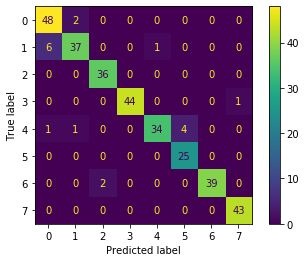

In [65]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knc, x_test, y_test) 
plt.show()

#### KNN  tuning <a name="d411"></a>

Minimal error rate indicats the best K value. However, using the test data for hyperparameter tuning results overfitting. Hence, So 10-fold cross validation is used to calculate the error rate  for a subset  of training  set.

In [66]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
number = list(range(2, 100,1))

# empty list that will hold cv scores
cv_score = []

# perform 10-fold cross validation
for n in number:
    knc = KNeighborsClassifier(n_neighbors=n)
    score = cross_val_score(knc, x_train, y_train, cv=10, scoring='accuracy')
    cv_score.append(score.mean())

The optimal number of neighbors is 3


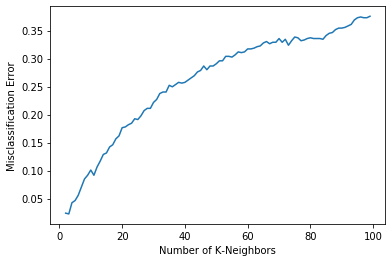

In [67]:
#changing to misclassification error
error = [1 - x for x in cv_score]

# determining best k
opti = number[error.index(min(error))]
print("The optimal number of neighbors is {}".format(opti))

# plot misclassification error vs k
plt.plot(number, error)
plt.xlabel("Number of K-Neighbors")
plt.ylabel("Misclassification Error")
plt.show()

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knc = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knc.fit(x_train, y_train)

# predict the response
pred = knc.predict(x_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9691358024691358


In [69]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

[[48  2  0  0  0  0  0  0]
 [ 3 40  0  0  1  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  1]
 [ 1  0  0  0 37  2  0  0]
 [ 0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 43]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.95      0.91      0.93        44
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        45
           4       0.97      0.93      0.95        40
           5       0.93      1.00      0.96        25
           6       1.00      1.00      1.00        41
           7       0.98      1.00      0.99        43

    accuracy                           0.97       324
   macro avg       0.97      0.97      0.97       324
weighted avg       0.97      0.97      0.97       324



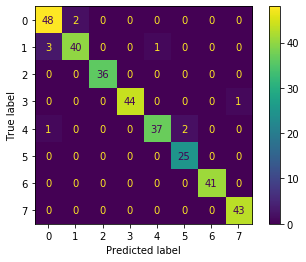

In [70]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knc, x_test, y_test) 
plt.show()

There is an increase in the accurancy score after tuning the KNN. From 94%, the accurancy score is increased to 97% after the tuning. Hence, it is always vital to find the optimal number of neighbors to get high accurancy score. 

### Decision Tree <a name="d42"></a>

In [71]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
gs_DT = DecisionTreeClassifier()

# Train Decision Tree Classifer
gs_DT = gs_DT.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = gs_DT.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8179012345679012


In [72]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print (classification_report(y_test, y_pred))

[[41  4  0  0  1  3  1  0]
 [ 8 32  0  1  2  1  0  0]
 [ 1  0 32  0  0  0  3  0]
 [ 0  0  1 41  0  0  3  0]
 [ 7  7  0  0 24  2  0  0]
 [ 4  1  0  0  2 18  0  0]
 [ 0  0  2  3  0  0 36  0]
 [ 0  0  2  0  0  0  0 41]]
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        50
           1       0.73      0.73      0.73        44
           2       0.86      0.89      0.88        36
           3       0.91      0.91      0.91        45
           4       0.83      0.60      0.70        40
           5       0.75      0.72      0.73        25
           6       0.84      0.88      0.86        41
           7       1.00      0.95      0.98        43

    accuracy                           0.82       324
   macro avg       0.82      0.81      0.81       324
weighted avg       0.82      0.82      0.82       324



#### Decision Tree tuning<a name="d422"></a>

In [73]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv_method = StratifiedKFold(n_splits=5, random_state=999)

In [74]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier()

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [5,6,7,10,15,20],
             'min_samples_split': [2,5]}

gs_DT2 = GridSearchCV(df_classifier, 
                     params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

gs_DT2.fit(x_train, y_train);
print("Best parameter",gs_DT2.best_params_)
print("Best score",gs_DT2.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameter {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2}
Best score 0.8379867549668875


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


In [75]:
model=gs_DT2.best_estimator_
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
gs_pred = model.predict(x_test)
gs_accuracy= accuracy_score(y_test, gs_pred)
print('Accuracy after tuning: ',gs_accuracy)

Accuracy after tuning:  0.8271604938271605


In [77]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
fit=dt_classifier.fit(x_train, y_train)
y_pre = fit.predict(x_test)
dt_classifier.score(x_test, y_test)


0.8271604938271605

In [78]:
print(confusion_matrix(y_test, gs_pred))
print(classification_report(y_test, gs_pred))

[[41  2  0  0  4  3  0  0]
 [ 7 31  0  0  1  2  0  3]
 [ 0  2 34  0  0  0  0  0]
 [ 0  0  3 42  0  0  0  0]
 [ 3  6  0  0 26  4  0  1]
 [ 1  1  0  0  1 22  0  0]
 [ 0  0  6  3  0  0 32  0]
 [ 0  0  1  0  0  0  2 40]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        50
           1       0.74      0.70      0.72        44
           2       0.77      0.94      0.85        36
           3       0.93      0.93      0.93        45
           4       0.81      0.65      0.72        40
           5       0.71      0.88      0.79        25
           6       0.94      0.78      0.85        41
           7       0.91      0.93      0.92        43

    accuracy                           0.83       324
   macro avg       0.83      0.83      0.82       324
weighted avg       0.83      0.83      0.83       324



There is a little raise in the accuracy score after tuning the Decision Tree. From 82%, the accuracy score is increased to 83% after the tuning. Hence, it is always vital to find the optimal value to get high accuracy score in order to control the overall behaviour of the algorithm. 

## Performance comparison  <a name="d5"></a>

In [79]:
#scoring for KNN
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)
scores_knn = cross_val_score(knc, x_test, y_test, cv=cv_method_ttest,  
                             n_jobs=-2,scoring='accuracy')
scores_knn.mean()

0.9136363636363637

In [80]:
##scoring for Decision Tree
cv_results_DT = cross_val_score(estimator=gs_DT2.best_estimator_,
                                X=x_test,
                                y=y_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='accuracy')
cv_results_DT.mean()

0.759185606060606

Paired t-test is performed to determine whether the models are having statistically significant difference. 

In [81]:
from scipy import stats

print(stats.ttest_rel(scores_knn, cv_results_DT))


Ttest_relResult(statistic=7.057080230752245, pvalue=5.939603759696747e-05)


A p value lesser than 0.05 denotes that there is a significant difference between this two models. The output shows that, at a 95% significance level, KNN is statistically the best model in terms of 'Accuracy' in contrast to the test data.

The following metrics are considered to evaluate models based on the test set:
- Accuracy
- Precision
- Recall
- F1 Score 
- Confusion Matrix

In [82]:
print("\nClassification report for K-Nearest Neighbor") 
print (classification_report(y_test, pred))

print("\nClassification report for Decision tree") 
print(classification_report(y_test, gs_pred))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.95      0.91      0.93        44
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        45
           4       0.97      0.93      0.95        40
           5       0.93      1.00      0.96        25
           6       1.00      1.00      1.00        41
           7       0.98      1.00      0.99        43

    accuracy                           0.97       324
   macro avg       0.97      0.97      0.97       324
weighted avg       0.97      0.97      0.97       324


Classification report for Decision tree
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        50
           1       0.74      0.70      0.72        44
           2       0.77      0.94      0.85        36
           3       0.93      0.93      0.93  

In [83]:
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(y_test, pred))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(y_test, gs_pred))


Confusion matrix for K-Nearest Neighbor
[[48  2  0  0  0  0  0  0]
 [ 3 40  0  0  1  0  0  0]
 [ 0  0 36  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  1]
 [ 1  0  0  0 37  2  0  0]
 [ 0  0  0  0  0 25  0  0]
 [ 0  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 43]]

Confusion matrix for Decision Tree
[[41  2  0  0  4  3  0  0]
 [ 7 31  0  0  1  2  0  3]
 [ 0  2 34  0  0  0  0  0]
 [ 0  0  3 42  0  0  0  0]
 [ 3  6  0  0 26  4  0  1]
 [ 1  1  0  0  1 22  0  0]
 [ 0  0  6  3  0  0 32  0]
 [ 0  0  1  0  0  0  2 40]]


Since in this project we are analyzing the influence of proteins,recall is chosen as the performance metric which is also known as the true positive rate(TPR). In this context, KNN would is the best performer since it produces the highest recall score for mice class.The confusion matrices are in accordance with the classification reports. This is also supporting our finding that KNN is measurably the best performer with regards to the accuracy metric.

# Limitations and Solutions <a name="e"></a>
The modelling strategy has some limitations: <br>

Firstly, only 15 features selected for the modelling. The number of features in the feature selection can be increased. The dataset is also small with only 753 rows for the training. More potential data can be gathered in future in order to optimize the classifier even more. 

Another limitation is the decision tree can be very unstable. It is because of the small variation in the dataset. In classification model, if some dominate classes are present , it will create biased trees.Therefore, increasing the depth is crucial to get optimal result. 

# Summary and Conclusion <a name="f"></a>
KNN model with 15 best features chosen by Random Forest Importance (RFI) produces the highest accuracy score on the training data. Moreover, KNN outperforms Decision Tree during the evaluation on the test data. Furthermore, KNN model shows the highest recall score on the test data. From the observation we can say that our model is not sensitive to the number of the features. Since it can able to work with 15 features perferable to work with the full features. Overall, we achieved the best performance for the task of analyzing the influence of proteins that impact the recuperating ability of the Down Syndrome mice to learn with the accuracy score of 97% on the Mice Protein Expression Data Set using our proposed ensemble. 